# I/ Dữ liệu

### Thông tin về dữ liệu:

(note)

# II/ Khám phá dữ liệu:

### Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import pandas as pd
import numpy as np

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")
df.head()

,id,scientist,Vietnamese Name,field.1,field.2,au.key,au.solo,au.coll,au.uniq,au.vn,...,age,restime,sex,ceb,affil1,affil2,Full affiliation name,prov/coun,region,intexp
0,s001,nguyenngocanh,Nguyen Ngoc Anh,econ,manag,3,0,3,11,9,...,46,20,M,1.0,Depocen,NaN,Dev and Pol Res Center,HN,North,NaN
1,s002,phamntloan,Pham N T Loan,econ,manag,2,1,1,4,1,...,30,4,F,2.0,BUH,NaN,Banking Univ HCM,HCM,South,NaN
2,s003,vuongquanhoang,Vuong Quan Hoang,econ,health,23,11,2,12,10,...,46,20,M,3.0,FPTU,FSB,FBT School of Business,HN,North,NaN
3,s004,nguyenvietcuong,Nguyen Viet Cuong,econ,pol,37,23,14,26,15,...,41,15,M,4.0,NEU,IPMM,"Inst Pub Pol & Manag, Natl Econ Univ",HN,North,NaN
4,s005,giangthanhlong,Giang Thanh Long,pol,econ,11,4,7,12,8,...,42,15,M,4.0,NEU,IPMM,Natl Econ Univ,HN,North,NaN


### Thông tin thuộc tính:

In [3]:
num_rows, num_cols = df.shape
print("Dữ liệu có {} dòng, {} cột.".format(num_rows, num_cols))

Dữ liệu có 412 dòng, 25 cột.


**1. age:**	Tuổi

**2. sex**:	Giới tính

**3. affil**:	During the manual phase, we chose the affiliations where the researchers are full-time employed. During the semi-automatic phase, due to the data structure, we assigned the affiliations according to each paper.

**4. region**:	Khu vực gồm : North, South, Centre and Overseas

**5. field**:	Lĩnh vực 

**6. ttitems**:	Tổng số ấn phẩm trong Scopus. Đơn vị: (các) mục.

**7. au.solo**:	Số lượng ấn phẩm cá nhân.

**8. au.key**:	  Số lượng ấn phẩm mà đối tượng khảo sát đóng vai trò chủ đạo. Một người được coi là có vai trò chính trong một bài báo khi người đó là tác giả đơn, tác giả đầu tiên hoặc đồng tác giả. Đơn vị: (các) mục.

**9. au.coll**:	Số lượng các ấn phẩm mà đối tượng khảo sát không phải là tác giả chính hay tác giả cá nhân. Do đó, au.co = ttlitems − au.key. Đơn vị: (các) mục.

**10. cp.sdc, cp.eq, cp.fl**:	The measure of relative scientific output. When we calculate this measure manually, the absolute productivity is converted using the method of sequence-determines-credit (cp.sdc)29–31. Then, using the semi-automatic system, we added two more measures: equal contribution for all (cp.eq) and first-last-author emphasis (cp.fl)29,31.

**11. au.vn**:	Số lượng các nhà nghiên cứu Việt Nam mà đối tượng khảo sát là đồng tác giả. Mỗi nhà nghiên cứu Việt Nam chỉ được tính một lần. Đơn vị: người.

**12. au.fr**:	Số lượng nhà nghiên cứu nước ngoài mà đối tượng khảo sát đã đồng tác giả. Mỗi nhà nghiên cứu nước ngoài chỉ được tính một lần. Đơn vị: người.

**13. au.uniq**:  Tổng của au.vn và au.fr. Đơn vị: người

**14. restime**: số năm nghiên cứu kể từ khi tốt nghiệp Thạc sĩ.


## Tiền xử lý:

In [4]:
#xem thông tin data:
df.info()

if df.isnull().values.any() == False:
    print("=> Không có ô giá trị nào bị thiếu.")
else:
    print("Dữ liệu bị thiếu.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     412 non-null    object 
 1   scientist              412 non-null    object 
 2   Vietnamese Name        412 non-null    object 
 3   field.1                412 non-null    object 
 4   field.2                412 non-null    object 
 5   au.key                 412 non-null    int64  
 6   au.solo                412 non-null    int64  
 7   au.coll                412 non-null    int64  
 8   au.uniq                412 non-null    int64  
 9   au.vn                  412 non-null    int64  
 10  au.fc                  412 non-null    int64  
 11  au.ttl                 412 non-null    float64
 12  ttlitems               412 non-null    int64  
 13   cp                    412 non-null    float64
 14  title                  412 non-null    int64  
 15  age   

Cột giới tính có chút vấn đề:

In [5]:
test = df['sex'].copy().value_counts()
test

M     255
F     153
F       3
M       1
Name: sex, dtype: int64

Dữ liệu cần được sửa lại bằng cách bỏ dấu cách trước và sau các biến của cột sex:

In [20]:
df['sex'] = df['sex'].replace(' ', '', regex=True)

Dữ liệu cần được sửa lại bằng cách bỏ dấu cách trước và sau các biến của cột field.1:c

In [21]:
df['field.1'] = df['field.1'].replace(' ', '', regex=True)

# III/ Trực quan hóa:

## Nội dung trực quan:


>1. Lĩnh vực nghiên cứu của các nhà khoa học.

> 2. Độ tuổi các nhà nghiên cứu

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)

> . (note)


## Trực quan bằng biểu đồ:

### 1. Lĩnh vực nghiên cứu của các nhà khoa học.

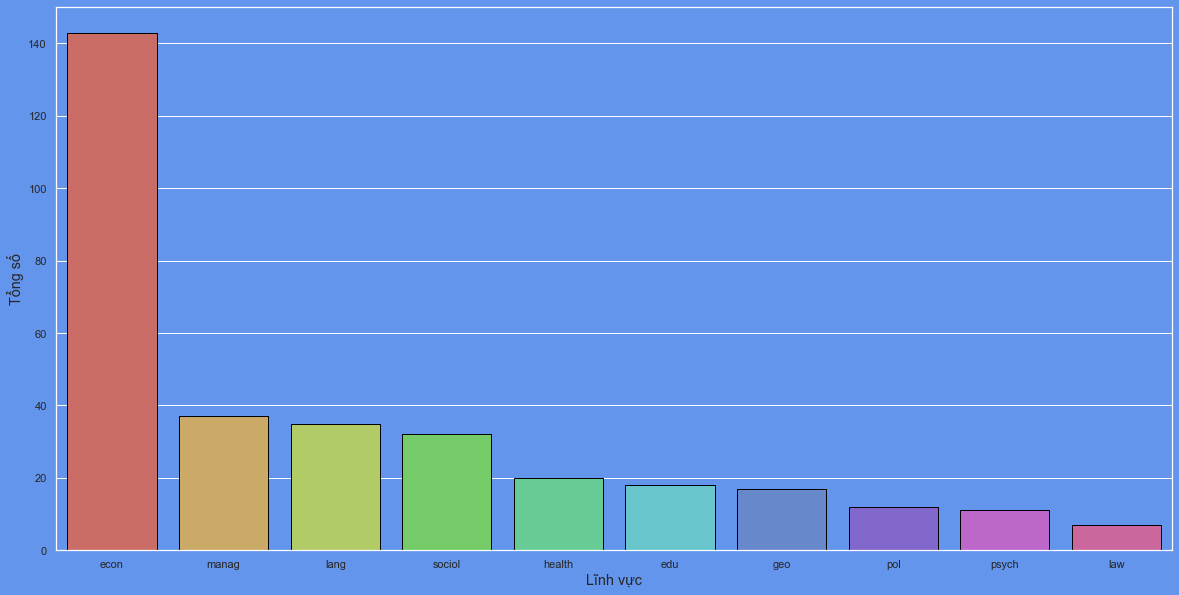

In [28]:
Series_1 = df['field.1'].copy().value_counts()

sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue', 'figure.figsize':(20,10)})

# ax.bar(Series_1.head(10).index, Series_1.head(10).values, fill='black', color="#2ecc71", edgecolor=['black'])
ax = sns.barplot(Series_1.head(10).index, Series_1.head(10).values, fill='black', color="#2ecc71", edgecolor=['black']
      , palette=sns.color_palette("hls", 10))


ax.set_ylabel('Tổng số', fontsize='large')
ax.set_xlabel('Lĩnh vực', fontsize='large')

plt.savefig("pic1_1.png")


**Nhận xét**: Qua biểu đồ trên, ta thấy các nhà nghiên cứu chủ yếu tập trung vào lĩnh vực kinh tế (economy). Ngoài ra các ngành  như xã hội học (sociology), ngôn ngữ (language).. cũng được chú trọng.

Cụ thể hơn ta có thể hiển thị phần trăm của lĩnh vực kinh tế: 

In [16]:
df_1 = df.copy()
list_fill = []
for r in df['field.1']:
    if r == 'econ':
        list_fill.append('econ')
    else:
        list_fill.append('other')
df_1['Field'] = np.array(list_fill)

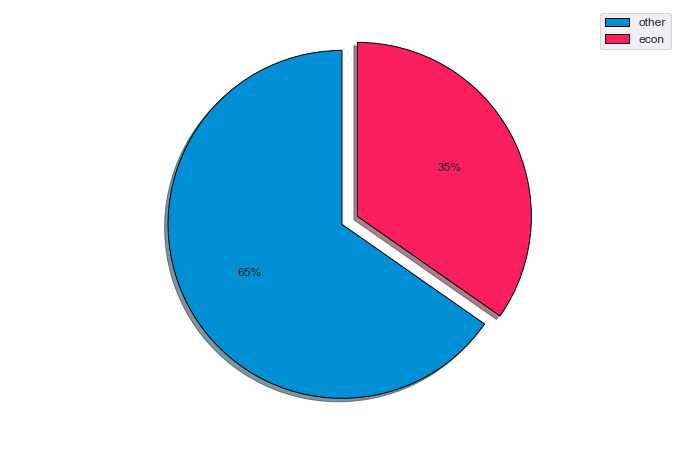

In [17]:
Series_1_hat = df_1['Field'].value_counts()
#Trực quan %
plt.figure(figsize=(12,8))
plt.axis('equal');
# colors = ['#008fd5', '#fc4f30']
colors = ['#008fd5', '#fc1f60']
plt.pie(Series_1_hat, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, 
        explode = (0, 0.1), autopct='%1.f%%',shadow=True);
plt.legend(loc='best', labels=Series_1_hat.index, fontsize='medium')
plt.savefig("pic1_2.png")
plt.show()

**Nhận xét**: Cụ thể, lĩnh vực kinh tế chiếm tới 35% số nghiên cứu ở nước ta. 

### **2. Độ tuổi các nhà nghiên cứu**

In [19]:
df_age = df['age']
mean = df_age.mean()
median = df_age.median()

0      46
1      30
2      46
3      41
4      42
       ..
407    35
408    35
409    60
410    27
411    24
Name: age, Length: 412, dtype: int64

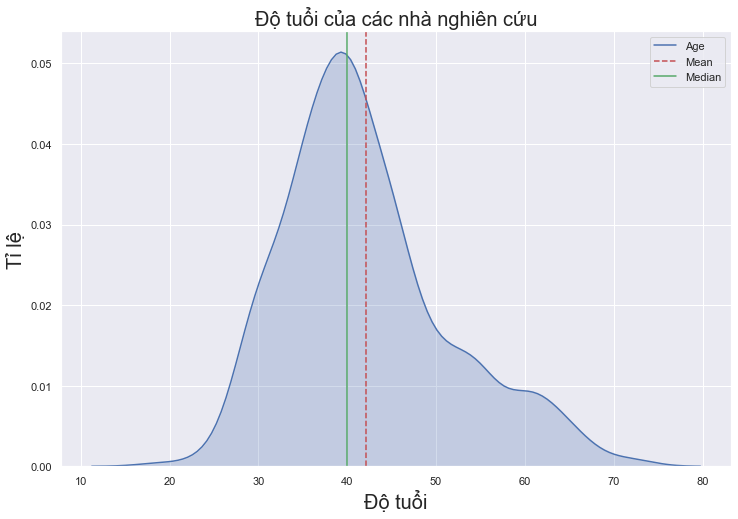

In [11]:
sns.set(rc={'figure.figsize':(12,8)})
df_age = df['age']
sns.kdeplot(df_age, label='Age', shade = True)
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Age':df_age, 'Mean':mean,'Median':median})
plt.title('Độ tuổi của các nhà nghiên cứu', fontsize = 20)
plt.xlabel('Độ tuổi', fontsize = 20);
plt.ylabel('Tỉ lệ', fontsize = 20)
plt.savefig("pic2_1.png")
plt.show()

**Kết luận:** Nhìn vào biểu đồ ta thấy các nhà nghiên cứu bắt đầu công trình của mình chủ yếu vào giai đoạn từ 30->50 tuổi. Các nhà nghiên cứu trẻ (< 30 tuổi) còn khá ít và con số này cũng không nhiều khi các nhà nghiên cứu bước qua tuổi 50. 

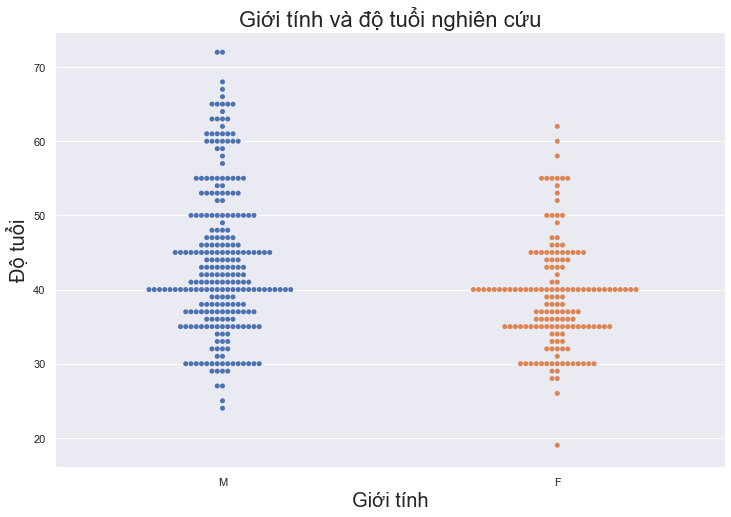

In [12]:
b = sns.swarmplot(x=df['sex'],y=df['age'])
b.axes.set_title('Giới tính và độ tuổi nghiên cứu', fontsize = 22)
b.set_xlabel('Giới tính', fontsize = 20)
b.set_ylabel('Độ tuổi', fontsize = 20)
plt.savefig("pic2_2.png")
plt.show()

**Kết luận:** Nhìn vào biểu đồ ta thấy các nhà nghiên cứu bắt đầu công trình của mình chủ yếu vào giai đoạn từ 30->50 tuổi. Các nhà nghiên cứu trẻ (< 30 tuổi) còn khá ít và con số này cũng không nhiều khi các nhà nghiên cứu bước qua tuổi 50. 